# Analisis Penyajian Data Performa Siswa 

Nia Khairunnisa | 23083010027

Tugas 1

Kelas Analisis Data Eksploratif

# Deskripsi Kasus

Dataset ini berisi mengenai informasi tentang 2392 siswa sekolah menengah, data ini merinci demografi mereka, kebiasaan belajar, keterlibatan orang tua, kegiatan eksrakulikuler dan prestasi akademik.
Variabel target dan kelas mengklasifikasikan nilai siswa ke dalam beberapa kategori berbeda hal inilah yang mempengaruhi performa dari setiap siswa, yang dapat dianalisis statistik. Berikut adalah beberapa variabel yang diamati.

Informasi Siswa

ID Pelajar

1.	StudentID : ID pengenal unik yang diberikan kepada setiap siswa (1001 hingga 3392).

Rincian Demografi

2.	Usia : Usia siswa berkisar antara 15 hingga 18 tahun.

3.	Jenis Kelamin : Jenis Kelamin siswa, di mana 0 mewakili Laki-laki dan 1 mewakili Perempuan.

4.	Suku Bangsa : Suku bangsa siswa, dikodekan sebagai berikut:
•	0: Kaukasia
•	1: Afrika Amerika
•	2: Asia
•	3: Lainnya

5.	Pendidikan Orang Tua : Tingkat pendidikan orang tua, dikodekan sebagai berikut:
•	0: Tidak ada
•	1: Sekolah Menengah Atas
•	2: Beberapa Perguruan Tinggi
•	3: Sarjana
•	4: Lebih Tinggi

Kebiasaan Belajar

6.	StudyTimeWeekly : Waktu belajar mingguan dalam jam, berkisar dari 0 hingga 20.

7.	Ketidakhadiran : Jumlah ketidakhadiran selama tahun ajaran, berkisar antara 0 hingga 30.

8.	Bimbingan Belajar : Status bimbingan belajar, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

Keterlibatan Orang Tua

9.	ParentalSupport : Tingkat dukungan orangtua, dikodekan sebagai berikut:
•	0: Tidak ada
•	1: Rendah
•	2: Sedang
•	3: Tinggi
•	4: Sangat Tinggi

Kegiatan Ekstrakurikuler

10.	Ekstrakurikuler : Partisipasi dalam kegiatan ekstrakurikuler, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

11.	Olahraga : Partisipasi dalam olahraga, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

12.	Musik : Partisipasi dalam kegiatan musik, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

13.	Kepanitiaan : Partisipasi dalam kesukarelaan mengikuti kepanitiaan, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

Prestasi Akademik

14.	IPK : Rata-rata Nilai Poin pada skala 2,0 hingga 4,0, dipengaruhi oleh kebiasaan belajar, keterlibatan orang tua, dan kegiatan ekstrakurikuler.

Variabel Target: Kelas Nilai

15.	GradeClass : Klasifikasi nilai siswa berdasarkan IPK:
•	0: 'A' (IPK >= 3,5)
•	1: 'B' (3,0 <= IPK < 3,5)
•	2: 'C' (2,5 <= IPK < 3,0)
•	3: 'D' (2,0 <= IPK < 2,5)
•	4: 'F' (IPK < 2,0)



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%pylab inline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                        AdaBoostClassifier, GradientBoostingClassifier
pylab.rcParams['figure.figsize'] = (10, 7)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Tugas Kuuuu\Semester 3\Analisis Data Eksploratif\archive (14)\Student_performance_data _.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [23]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [12]:
data['Age'].value_counts()

15    630
16    593
17    587
18    582
Name: Age, dtype: int64

# Preprocessing Data

# Melihat Missing Value

In [26]:
data.fillna(method='ffill', inplace=True)  

In [27]:
np.sum(data.isnull())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
datacopy=data.copy()

Karena tidak ada missing value jadi lanjut ke tahap selanjutnya

# Mengecek Data Outlier

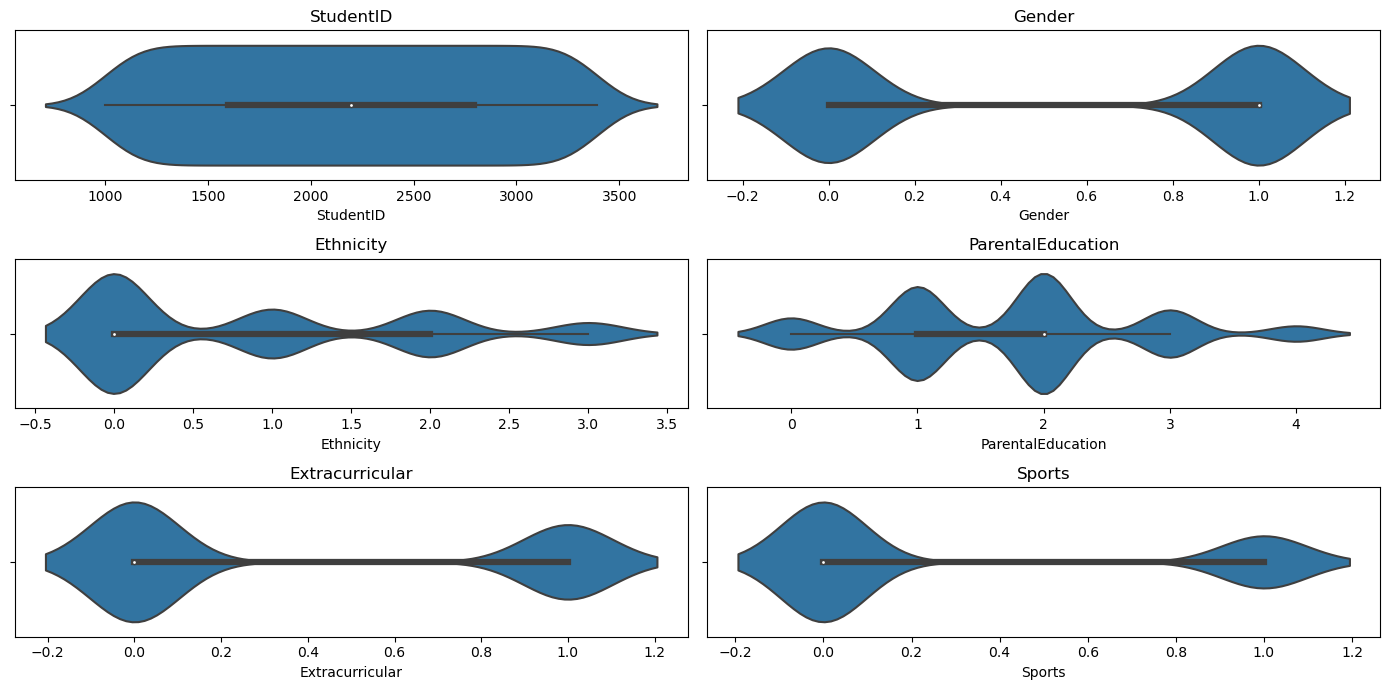

In [14]:
data_cont = data.drop(['Age','GPA', 'StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Tutoring', 'Music'], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))
feature_index = 0
for i in range(3):
    for a in range(2):
        if feature_index < len(data_cont.columns):
            ax = sns.violinplot(data=data_cont, x=data_cont.columns[feature_index], ax=axes[i, a])
            ax.set(title=data_cont.columns.values[feature_index])
            feature_index += 1
        else:
            fig.delaxes(axes[i, a])

plt.tight_layout()  
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# Melakukan Analisis Deskriptif

In [34]:
# Menghitung nilai rata rata dan nilai tengah dari GPA siswa
rata_rata_gpa = data['GPA'].mean()
median_gpa = data['GPA'].median()

print(f"Rata-rata GPA siswa adalah: {rata_rata_ipk:.2f}")
print(f"Median GPA siswa adalah: {median_ipk:.2f}")

Rata-rata GPA siswa adalah: 1.91
Median GPA siswa adalah: 1.89


In [37]:
# Membuat tabel Frekuensi 
tabel_frekuensi = data['Gender'].value_counts()
print(tabel_frekuensi)

1    1222
0    1170
Name: Gender, dtype: int64


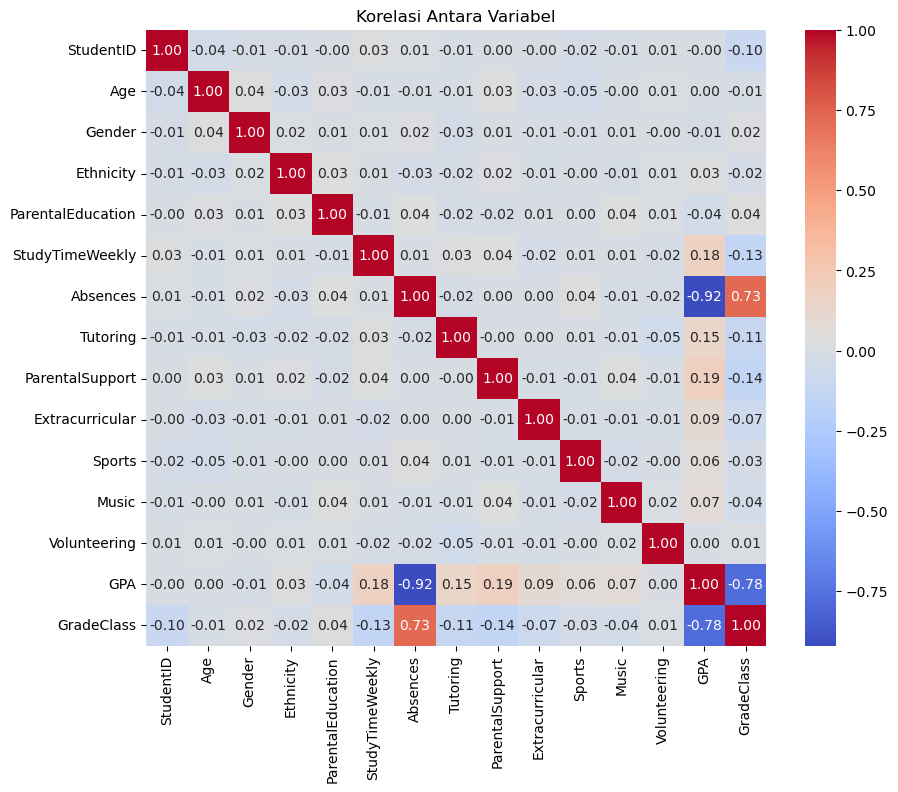

Jadi hasil dari analisis korelasi antara waktu belajar dengan nilai yang didapat adalah 0.1792751268560882


In [69]:
# Menghitung korelasi
correlation_matrix = data.corr()
korelasi = data['StudyTimeWeekly'].corr(data['GPA'])

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antara Variabel')
plt.show()
print("Jadi hasil dari analisis korelasi antara waktu belajar dengan nilai yang didapat adalah",korelasi)

# Visualisasi Data

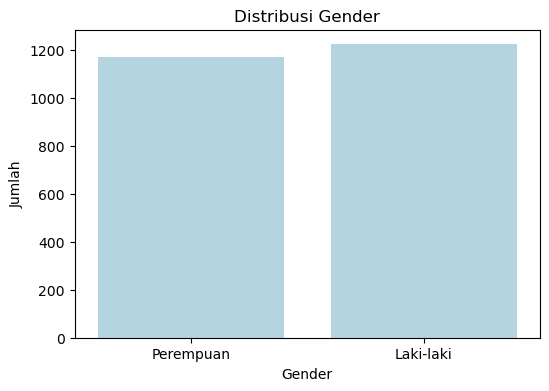

In [130]:
# Distribusi gender (BAR PLOT)

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender',color = 'lightblue', data=data)
plt.title('Distribusi Gender')
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki'])
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show() 

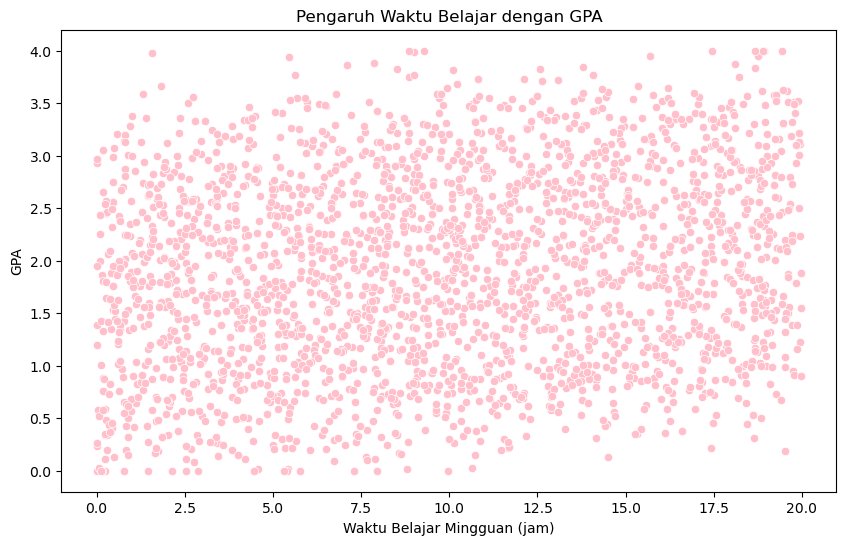

In [78]:
# SCATTER PLOT (Waktu belajar vs GPA)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA',color ='pink', data=data)
plt.title('Pengaruh Waktu Belajar dengan GPA')
plt.xlabel('Waktu Belajar Mingguan (jam)')
plt.ylabel('GPA')
plt.show()

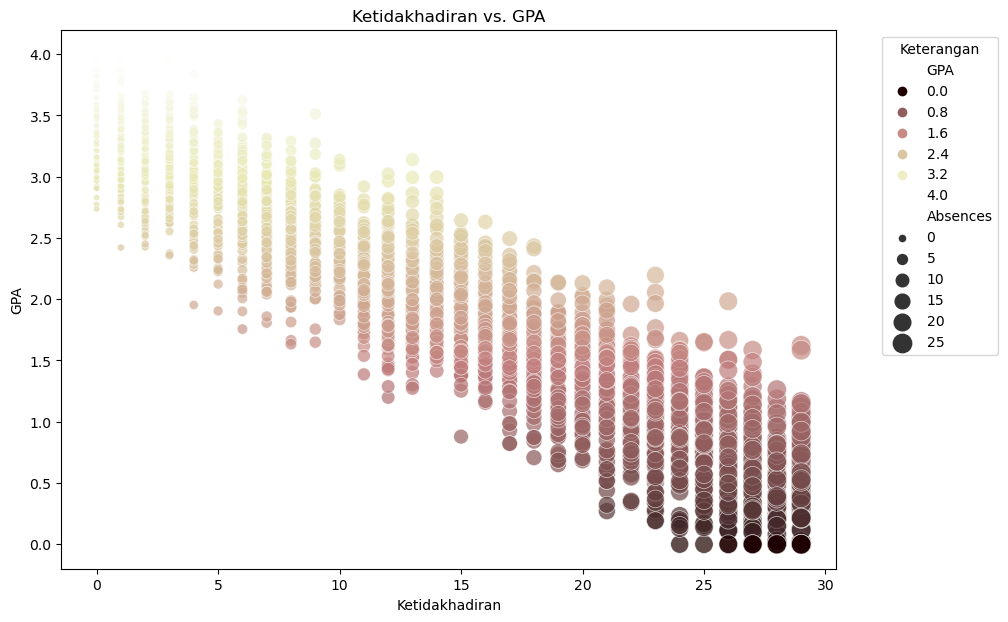

In [115]:
# Melihat plot hubungan antara Ketidakhadiran dengan NIlai yang diperoleh
sns.scatterplot(x='Absences', y='GPA', size='Absences', sizes=(20, 200), hue='GPA', palette='pink', data=data, alpha=0.7)

plt.title('Ketidakhadiran vs. GPA')
plt.xlabel('Ketidakhadiran')
plt.ylabel('GPA')
plt.legend(title='Keterangan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


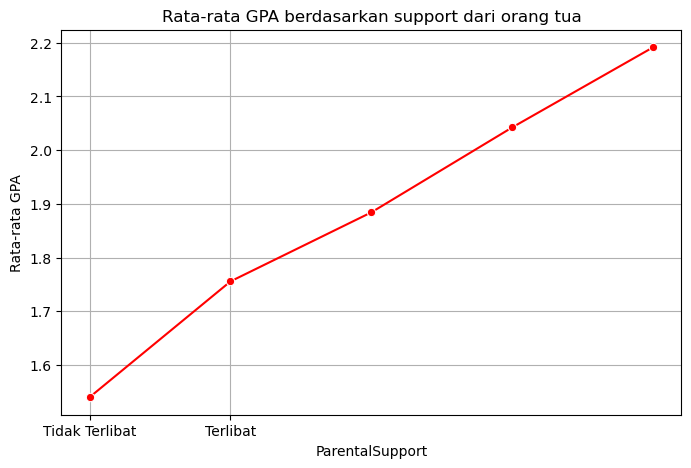

In [121]:
# Menghitung rata-rata GPA berdasarkan kegiatan ekstrakurikuler
average_gpa = data.groupby('ParentalSupport')['GPA'].mean().reset_index()

# Membandingkan GPA berdasarkan kegiatan ekstrakurikuler menggunakan diagram garis
plt.figure(figsize=(8, 5))
sns.lineplot(x='ParentalSupport', y='GPA', data=average_gpa,color='red' ,marker='o')
plt.title('Rata-rata GPA berdasarkan support dari orang tua')
plt.xticks(ticks=[0, 1], labels=['Tidak Terlibat', 'Terlibat'])
plt.xlabel('ParentalSupport')
plt.ylabel('Rata-rata GPA')
plt.grid()
plt.show()

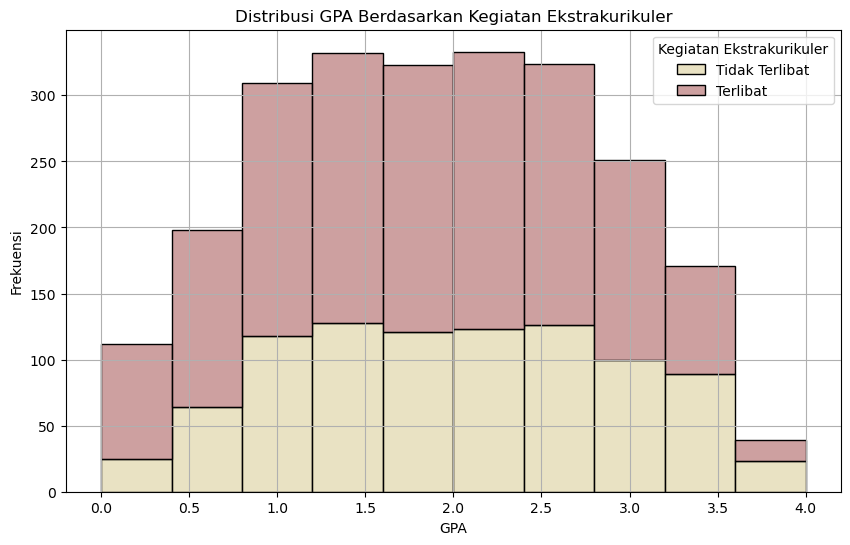

In [129]:
# Membuat histogram untuk GPA berdasarkan kegiatan ekstrakurikuler
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='GPA', hue='Extracurricular', multiple='stack', bins=10, palette='pink', alpha=0.7)

plt.title('Distribusi GPA Berdasarkan Kegiatan Ekstrakurikuler')
plt.xlabel('GPA')
plt.ylabel('Frekuensi')
plt.legend(title='Kegiatan Ekstrakurikuler', labels=['Tidak Terlibat', 'Terlibat'])
plt.grid()
plt.show()

In [123]:
print("Kesimpulan:")
print("1. Ada hubungan positif antara waktu belajar dan GPA.")
print("2. Siswa yang terlibat dalam kegiatan ekstrakurikuler cenderung memiliki GPA yang lebih tinggi.")
print("3. Ketidakhadiran yang lebih tinggi berhubungan dengan GPA yang lebih rendah.")
print("\n")
print("Rekomendasi:")
print("1. Mendorong siswa untuk lebih banyak belajar.")
print("2. Mendorong partisipasi dalam kegiatan ekstrakurikuler.")
print("3. Memperhatikan siswa dengan tingkat ketidakhadiran tinggi.")

Kesimpulan:
1. Ada hubungan positif antara waktu belajar dan GPA.
2. Siswa yang terlibat dalam kegiatan ekstrakurikuler cenderung memiliki GPA yang lebih tinggi.
3. Ketidakhadiran yang lebih tinggi berhubungan dengan GPA yang lebih rendah.


Rekomendasi:
1. Mendorong siswa untuk lebih banyak belajar.
2. Mendorong partisipasi dalam kegiatan ekstrakurikuler.
3. Memperhatikan siswa dengan tingkat ketidakhadiran tinggi.
